Train and fine-tune a decision tree for the moons dataset by following
these steps:
a. Use make_moons(n_samples=10000, noise=0.4) to generate a
moons dataset.
b. Use train_test_split() to split the dataset into a training set and a test
set.
c. Use grid search with cross-validation (with the help of the
GridSearchCV class) to find good hyperparameter values for a
DecisionTreeClassifier. Hint: try various values for
max_leaf_nodes.
d. Train it on the full training set using these hyperparameters, and
measure your model’s performance on the test set. You should get
roughly 85% to 87% accuracy

load data

In [6]:
from sklearn.datasets import make_moons

moons = make_moons(n_samples=10000, noise=0.4)

In [8]:
data = moons[0]
label = moons[1]

In [11]:
import numpy as np

np.unique(label)

array([0, 1], dtype=int64)

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.2, random_state=42) 

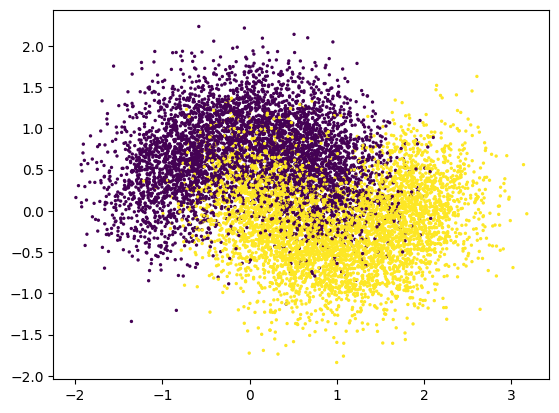

In [20]:
import matplotlib.pyplot as plt

plt.scatter(data[:, 0],data[:, 1], c=label, s = 2)
plt.show()

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {
    'max_leaf_nodes': list(range(2, 100)),
    'max_depth': list(range(1, 7)),
    'min_samples_split': [2, 3, 4]
}

grid_search_dtc = GridSearchCV(DecisionTreeClassifier(random_state=42),
                               param_grid=params, cv=3)

grid_search_dtc.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]})

In [25]:
best_model = grid_search_dtc.best_estimator_
print(grid_search_dtc.best_score_)

0.8572497923881045


In [26]:
best_model.score(X_test, y_test)

0.8595